## Описание алгоритма стохастического градиентного спуска (SGD) с L2-регуляризацией

Данный алгоритм используется для аппроксимации функции $f(x)$ на заданном интервале с помощью полиномиальной модели степени $N-1$. Обучение модели производится с помощью алгоритма стохастического градиентного спуска с использованием мини-батчей и добавлением L2-регуляризации.

**Цель:** Найти вектор параметров $w = [w_0, w_1, \dots, w_{N-1}]^T$, минимизирующий функцию потерь, включающую усеченный эмпирический риск и L2-регуляризатор.

**Функция для аппроксимации:**

$$f(x) = 0.5 \cdot x + 0.2 \cdot x^2 - 0.05 \cdot x^3 + 0.2 \cdot \sin(4x) - 2.5$$

**Модель для аппроксимации:**

$$a(x) = w_0 + \sum_{i=1}^{N-1} w_i \cdot x^i$$

при $N=5$.

**Усеченный эмпирический риск:**

В SGD с мини-батчами на каждой итерации используется усеченный эмпирический риск, вычисленный по случайному мини-батчу данных:

$$Q_k(w) = \frac{1}{K} \sum_{i=k}^{k+K-1} (a(x_i, w) - y_i)^2 = \frac{1}{K} \sum_{i=k}^{k+K-1} (w^T \cdot x_i - y_i)^2$$

где:
- $k$ - случайно выбранный начальный индекс мини-батча.
- $K$ (`batch_size` в коде) - размер мини-батча.
- $a(x_i, w)$ - значение модели в точке $x_i$ с текущими параметрами $w$.
- $y_i$ - истинное значение функции в точке $x_i$.

**Алгоритм стохастического градиентного спуска с L2-регуляризацией:**

Правило обновления вектора параметров $w$ включает градиент усеченного эмпирического риска и член L2-регуляризации:

$$w_n = w_{n-1} - \eta \cdot \left(\frac{\partial Q_k(w)}{\partial w} + \lambda \cdot \tilde{w}\right)$$

где:
- $w_n$ - вектор параметров на текущей итерации.
- $w_{n-1}$ - вектор параметров на предыдущей итерации.
- $\eta$ - шаг обучения (learning rate).
- $\frac{\partial Q_k(w)}{\partial w}$ - градиент усеченного эмпирического риска по вектору параметров $w$ для текущего мини-батча.
- $\lambda$ - коэффициент L2-регуляризации.
- $\tilde{w} = [0, w_1, \dots, w_{N-1}]^T$ - вектор параметров, где первый параметр $w_0$ не регуляризуется.

**Градиент усеченного эмпирического риска:**

Производная усеченного показателя качества по вектору параметров $w$ для мини-батча:

$$\frac{\partial Q_k(w)}{\partial w} = \frac{2}{K} \sum_{i=k}^{k+K-1} (w^T \cdot x_i - y_i) \cdot x_i^T$$

где $x_i = [1, x, x^2, \dots, x^{N-1}]^T$ - вектор признаков для i-го образа в мини-батче.

**Матрица признаков X:**

Матрица признаков $X$ для всей выборки формируется таким образом, что каждая строка соответствует одной точке данных $x_i$ из интервала $[-4, 6]$. Столбцы матрицы содержат значения признаков для каждой точки, соответствующих степеням $x$ от 0 до $N-1$:

$$X = \begin{pmatrix}
1 & x_1 & x_1^2 & \cdots & x_1^{N-1} \\
1 & x_2 & x_2^2 & \cdots & x_2^{N-1} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_l & x_l^2 & \cdots & x_l^{N-1}
\end{pmatrix}$$

где $l$ - общее количество точек в выборке. Для $N=5$, матрица $X$ будет иметь 5 столбцов (от $x^0$ до $x^4$).

**Скользящее среднее ошибки:**

На каждой итерации алгоритма SGD пересчитывается значение экспоненциального скользящего среднего ошибки $Qe$ по формуле:

$$Qe = \lambda_{lm} \cdot Q_k(w) + (1 - \lambda_{lm}) \cdot Qe$$

где:
- $Qe$ - текущее значение скользящего среднего ошибки.
- $Q_k(w)$ - ошибка на текущем мини-батче.
- $\lambda_{lm}$ (`lm` в коде) - параметр сглаживания для скользящего среднего.

**Реализация в коде (общие моменты):**

В коде для реализации этого алгоритма необходимо будет:

1.  Определить целевую функцию $f(x)$ и подготовить данные (пары $x_i, y_i$) на заданном интервале.
2.  Создать полную матрицу признаков $X$ для всех отсчетов.
3.  Инициализировать параметры $w$, шаг обучения $\eta$, коэффициент L2-регуляризации $\lambda$, размер мини-батча $K$ (`batch_size`), число итераций $N$, и параметр сглаживания $\lambda_{lm}$ (`lm`).
4.  В цикле итераций:
    - Случайно выбрать начальный индекс `k` для мини-батча (`k = np.random.randint(0, sz-batch_size-1)`), где `sz` - размер выборки (`coord_x`).
    - Извлечь мини-батчи признаков (`X_batch`) и истинных значений (`y_batch`) из полных массивов $X$ и $y$.
    - Вычислить градиент усеченного эмпирического риска по мини-батчу (`gradient_batch`).
    - Сформировать вектор $\tilde{w}$ для L2-регуляризации (обнулив первый элемент $w_0$).
    - Обновить вектор параметров $w$ по формуле SGD с L2-регуляризацией: $w = w - \eta \cdot (gradient\_batch + \lambda \cdot \tilde{w})$.
    - Вычислить ошибку на текущем мини-батче (`Qk`) и обновить скользящее среднее ошибки (`Qe`).
5.  После завершения итераций:
    - Вычислить итоговое значение среднего эмпирического риска для всей выборки: $Q(a, X) = \frac{1}{n} \cdot \sum_{i=1}^{n} (a(x_i, w) - y_i)^2 = \frac{1}{n} \cdot (Xw - y)^T \cdot (Xw - y)$, где $n$ - общее количество точек в выборке, а $y$ - вектор истинных значений для всей выборки.
    - Вывести итоговые параметры $w$ (сохраненные в виде списка или кортежа с именем `w`), итоговую среднеквадратичную ошибку $Q$, и последнее значение скользящего среднего ошибки $Qe$.
    - (Опционально) Построить финальный график аппроксимации.

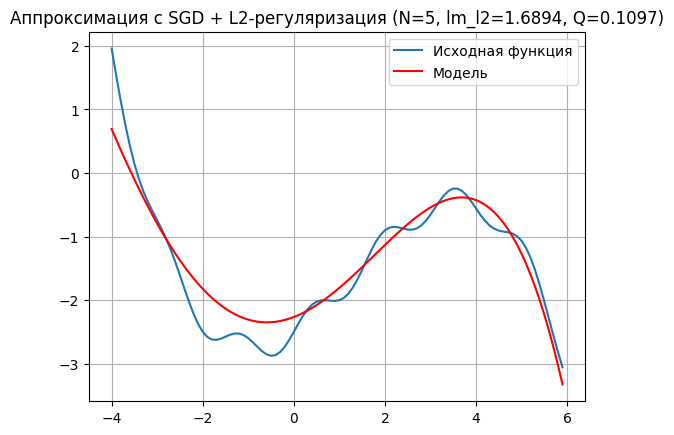

Итоговые веса (w):
[[-2.26606301]
 [ 0.27590766]
 [ 0.21276289]
 [-0.02597169]
 [-0.00392906]]

Итоговая среднеквадратичная ошибка (Q): 0.1097

Последнее значение скользящего среднего ошибки (Qe): 0.5486


In [1]:
import numpy as np
import matplotlib.pyplot as plt # Добавлен импорт

# исходная функция, которую нужно аппроксимировать моделью a(x)
def func(x):
    return 0.5 * x + 0.2 * x ** 2 - 0.05 * x ** 3 + 0.2 * np.sin(4 * x) - 2.5


# модель
def model(w, x):
    xv = np.array([x ** n for n in range(len(w))])
    return w.T @ xv


# функция потерь
def loss(w, x, y):
    return (model(w, x) - y) ** 2


# производная функции потерь
def dL(w, x, y):
    xv = np.array([x ** n for n in range(len(w))])
    return 2 * (model(w, x) - y) * xv


coord_x = np.arange(-4.0, 6.0, 0.1).reshape(-1,1) # значения по оси абсцисс [-4; 6] с шагом 0.1
coord_y = func(coord_x) # значения функции по оси ординат

N = 5 # сложность модели (полином степени N-1)
lm_l2 = 1.6894 # коэффициент лямбда для L2-регуляризатора
sz = len(coord_x)       # количество значений функций (точек)
eta = np.array([0.1, 0.01, 0.001, 0.0001, 0.000002]).reshape(-1,1) # шаг обучения для каждого параметра w0, w1, w2, w3, w4
w = np.zeros(N).reshape(-1,1) # начальные нулевые значения параметров модели
w_ = w.copy()
n_iter = 500 # число итераций алгоритма SGD
lm = 0.02 # значение параметра лямбда для вычисления скользящего экспоненциального среднего
batch_size = 20 # размер мини-батча (величина K = 20)
X = np.column_stack([
    np.ones_like(coord_x),
    coord_x,
    coord_x**2,
    coord_x**3,
    coord_x**4,
    ])
Y = coord_y.reshape(-1,1)
Qe = np.mean((X@w - Y)**2)# начальное значение среднего эмпирического риска
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел
# здесь продолжайте программу

for _ in range(n_iter):
  k = np.random.randint(0, sz-batch_size-1)
  X_batch, Y_batch = X[k:k+batch_size], Y[k:k+batch_size]
  Qk = np.mean((X_batch@w - Y_batch)**2)
  gradient = 2 / batch_size * (X_batch.T @ (X_batch@w - Y_batch))
  Qe = lm * Qk + (1 - lm) * Qe
  w_ = w.copy()
  w_[0] = 0
  w = w - eta * (gradient + lm_l2 * w_)

Q = np.mean((X@w - Y)**2)

# Код для отображения финального графика
fig, ax = plt.subplots()
ax.grid(True)
ax.plot(coord_x, coord_y, label='Исходная функция')
ax.plot(coord_x, X @ w, c="red", label='Модель')
ax.legend()
plt.title(f'Аппроксимация с SGD + L2-регуляризация (N={N}, lm_l2={lm_l2}, Q={Q:.4f})')
plt.show()

print(f"Итоговые веса (w):")
print(w)
print(f"\nИтоговая среднеквадратичная ошибка (Q): {Q:.4f}")
print(f"\nПоследнее значение скользящего среднего ошибки (Qe): {Qe:.4f}")

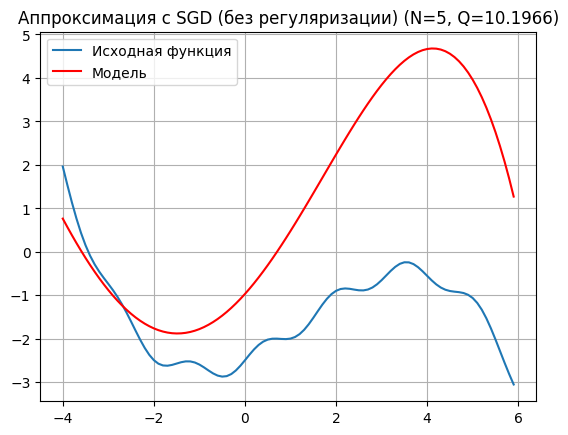

Итоговые веса (w):
[[-0.97405432]
 [ 1.17091428]
 [ 0.32593234]
 [-0.04269771]
 [-0.00597908]]

Итоговая среднеквадратичная ошибка (Q): 10.1966

Последнее значение скользящего среднего ошибки (Qe): 68.6011


In [2]:
import numpy as np
import matplotlib.pyplot as plt # Добавлен импорт

# исходная функция, которую нужно аппроксимировать моделью a(x)
def func(x):
    return 0.5 * x + 0.2 * x ** 2 - 0.05 * x ** 3 + 0.2 * np.sin(4 * x) - 2.5


# модель
def model(w, x):
    xv = np.array([x ** n for n in range(len(w))])
    return w.T @ xv


# функция потерь
def loss(w, x, y):
    return (model(w, x) - y) ** 2


# производная функции потерь
def dL(w, x, y):
    xv = np.array([x ** n for n in range(len(w))])
    return 2 * (model(w, x) - y) * xv


coord_x = np.arange(-4.0, 6.0, 0.1).reshape(-1,1) # значения по оси абсцисс [-4; 6] с шагом 0.1
coord_y = func(coord_x) # значения функции по оси ординат

N = 5 # сложность модели (полином степени N-1)
lm_l2 = 0 # Установлено лямбда = 0 для отсутствия регуляризации
sz = len(coord_x)       # количество значений функций (точек)
eta = np.array([0.1, 0.01, 0.001, 0.0001, 0.000002]).reshape(-1,1) # шаг обучения для каждого параметра w0, w1, w2, w3, w4
w = np.zeros(N).reshape(-1,1) # начальные нулевые значения параметров модели
w_ = w.copy()
n_iter = 500 # число итераций алгоритма SGD
lm = 0.02 # значение параметра лямбда для вычисления скользящего экспоненциального среднего
batch_size = 20 # размер мини-батча (величина K = 20)
X = np.column_stack([
    np.ones_like(coord_x),
    coord_x,
    coord_x**2,
    coord_x**3,
    coord_x**4,
    ])
Y = coord_y.reshape(-1,1)
Qe = np.mean((X@w - Y)**2)# начальное значение среднего эмпирического риска
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел
# здесь продолжайте программу

for _ in range(n_iter):
  k = np.random.randint(0, sz-batch_size-1)
  X_batch, Y_batch = X[k:k+batch_size], Y[k:k+batch_size]
  Qk = np.mean((X_batch@w - Y_batch)**2)
  gradient = 2 / batch_size * (X_batch.T @ (X_batch@w - Y_batch))
  Qe = lm * Qk + (1 - lm) * Qe
  w_ = w.copy()
  w_[0] = 0
  w = w - eta * (gradient + lm_l2 * w_)

Q = np.mean((X@w - Y)**2)

# Код для отображения финального графика
fig, ax = plt.subplots()
ax.grid(True)
ax.plot(coord_x, coord_y, label='Исходная функция')
ax.plot(coord_x, X @ w, c="red", label='Модель')
ax.legend()
plt.title(f'Аппроксимация с SGD (без регуляризации) (N={N}, Q={Q:.4f})')
plt.show()

print(f"Итоговые веса (w):")
print(w)
print(f"\nИтоговая среднеквадратичная ошибка (Q): {Q:.4f}")
print(f"\nПоследнее значение скользящего среднего ошибки (Qe): {Qe:.4f}")